In [1]:
#Data Science Basics
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

#SciKitLearn Stuff

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

#helpers
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\gamer\Desktop\section_33\school\university_of_texas\course_1\Demographic_Data.csv')

In [3]:
data.head()

,in-store,age,items,amount,region
0,1,19,7,51.786,1
1,1,19,6,69.598,1
2,1,19,7,70.721,1
3,1,19,2,83.041,1
4,1,19,2,97.664,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [5]:
#features
X = data.iloc[:,1:5]
print('Summary of feature sample')
X.head()

Summary of feature sample


,age,items,amount,region
0,19,7,51.786,1
1,19,6,69.598,1
2,19,7,70.721,1
3,19,2,83.041,1
4,19,2,97.664,1


In [6]:
#depedent variable
y = data['in-store']

In [7]:
#Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

In [8]:
#Modeling (Classification)
algo = DecisionTreeClassifier()
model = algo.fit(X_train,y_train)

In [9]:
#Predictions
preds = model.predict(X_test)

In [10]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.85      0.85     11982
           1       0.85      0.84      0.85     12018

    accuracy                           0.85     24000
   macro avg       0.85      0.85      0.85     24000
weighted avg       0.85      0.85      0.85     24000



In [11]:
from sklearn.tree import plot_tree

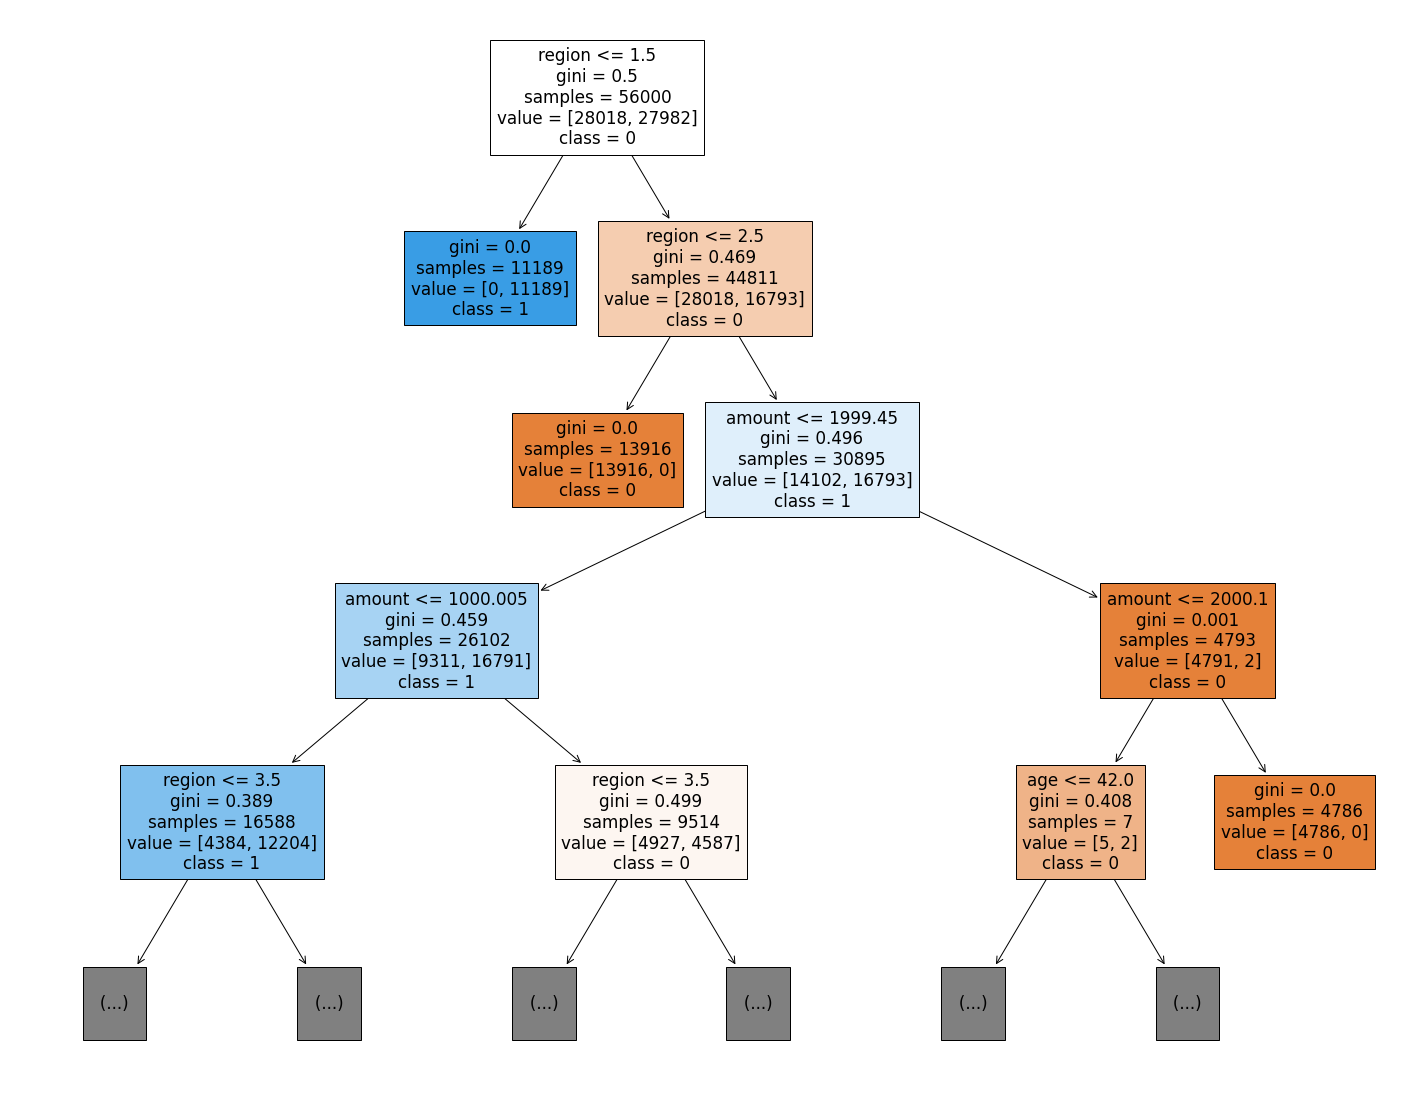

In [15]:
fig = plt.figure(figsize=(25,20))
tree = plot_tree(model, feature_names=X.columns,class_names=['0', '1', '2', '3'], filled=True, max_depth=4)

In [14]:
algo2 = RandomForestClassifier()
model2 = algo2.fit(X_train,y_train)

In [17]:
preds2 = model2.predict(X_test)

In [18]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86     11982
           1       0.84      0.89      0.86     12018

    accuracy                           0.86     24000
   macro avg       0.86      0.86      0.86     24000
weighted avg       0.86      0.86      0.86     24000



In [20]:
algo3 = GradientBoostingClassifier()
model3 = algo3.fit(X_train,y_train)

In [21]:
preds3 = model3.predict(X_test)

In [22]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     11982
           1       0.82      1.00      0.90     12018

    accuracy                           0.89     24000
   macro avg       0.91      0.89      0.89     24000
weighted avg       0.91      0.89      0.89     24000



In [23]:
model = DecisionTreeClassifier()

In [24]:
print(cross_val_score(model, X, y, cv=3))
# cv = number of folds being held out

[0.9999625  0.71684104 0.57275182]


In [25]:
algos_Class = []
algos_Class.append(('Random Forest Classifier', RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))

In [26]:
# classification
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
    names.append(name)
    results.append(result)

In [27]:
for i in range(len(names)):
    print(names[i],result[i].mean())

Random Forest Classifier 0.9999625004687441
Decision Tree Classifier 0.7183410207372408
